## HR Analytic dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data

In [2]:
df = pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [4]:
df.shape

(19158, 14)

In [5]:
df_copy = df

In [6]:
df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

### Initial obeservations : 
#### 1. Target coulmn is our target feature
#### 2. The data is imbalanced between the classes
#### 3. there are many mising values in the dataset
#### 4. quite moderate dataset
#### 5. Gender, relevant experience, enrolled univeristy, education level, major discipline, company type are the categorical features

### starting the FE&EDA

In [7]:
df.drop('enrollee_id', axis = 1, inplace = True)
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### handling the gender column

In [8]:
df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [9]:
df['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [10]:
df['gender'].isnull().sum()

4508

In [11]:
### since the gender class is imbalanced before using the onehot encoding, I am creating the two categories male, and female
### nan, other are subsituted to female
df['gender'] = df['gender'].apply(lambda x : 'Male' if x == 'Male' else 'Female')

In [12]:
df['gender'].value_counts()

Male      13221
Female     5937
Name: gender, dtype: int64

In [13]:
df['gender'].isnull().sum()

0

In [14]:
### one hot encoding
gender = pd.get_dummies(df['gender'], prefix = 'gender', dtype = int)
df = pd.concat([df, gender], axis = 1)
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,0,1
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0,1
2,city_21,0.624,Female,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0
3,city_115,0.789,Female,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,0,1


In [15]:
df.drop('gender', axis = 1, inplace = True)

In [16]:
df.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male
0,city_103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,0,1
1,city_40,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0,1
2,city_21,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0
3,city_115,0.789,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,0
4,city_162,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,0,1


### handling the relevant experience column

In [17]:
df['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [18]:
df['relevent_experience'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [19]:
### no missing value in the 'relevant experience column' so directly using the label encoding
df['relevent_experience'] = df['relevent_experience'].map({
    'Has relevent experience' : 1,
    'No relevent experience' : 0
})

In [20]:
df['relevent_experience'].value_counts()

1    13792
0     5366
Name: relevent_experience, dtype: int64

In [21]:
df.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male
0,city_103,0.920,1,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,0,1
1,city_40,0.776,0,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0,1
2,city_21,0.624,0,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0
3,city_115,0.789,0,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,0
4,city_162,0.767,1,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,0,1


### handling the enrolled_univeristy column

In [22]:
df['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [23]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [24]:
df['enrolled_university'].isna().sum()

386

In [25]:
df['enrolled_university'].fillna('Part time course', inplace = True)

In [26]:
### for this column I am going for the label encoding
df['enrolled_university'] = df['enrolled_university'].map({
    'no_enrollment' : 0, 'Part time course' : 1, 'Full time course' : 2
})

In [27]:
df.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male
0,city_103,0.920,1,0,Graduate,STEM,>20,NaN,NaN,1,36,1.0,0,1
1,city_40,0.776,0,0,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0,1
2,city_21,0.624,0,2,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,0
3,city_115,0.789,0,1,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,0
4,city_162,0.767,1,0,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,0,1


### education level column

In [28]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [29]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [30]:
df['education_level'].isna().sum()

460

In [31]:
### Using the same label encoding approach with substituting the the nan with primary school
df['education_level'].fillna('Primary School', inplace = True)

In [32]:
df['education_level'].isna().sum()

0

In [33]:
df['education_level'] = df['education_level'].map({
    'Primary School' : 0, 'High School' : 1, 'Graduate' : 2, 'Masters' : 3, 'Phd' : 4
})

In [34]:
df.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male
0,city_103,0.920,1,0,2,STEM,>20,NaN,NaN,1,36,1.0,0,1
1,city_40,0.776,0,0,2,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0,1
2,city_21,0.624,0,2,2,STEM,5,NaN,NaN,never,83,0.0,1,0
3,city_115,0.789,0,1,2,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,0
4,city_162,0.767,1,0,3,STEM,>20,50-99,Funded Startup,4,8,0.0,0,1


### major discipline column

In [35]:
df['major_discipline'].unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [36]:
df['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [37]:
df['major_discipline'].isna().sum()

2813

In [38]:
### for this one there may or may not be as clear relation so I will use one hot and subsituting with the 2 categories
### STEM and 'other
df['major_discipline']  = df['major_discipline'].apply(lambda x : 'STEM' if x == 'STEM' else 'Other')

In [39]:
df['major_discipline'].value_counts()

STEM     14492
Other     4666
Name: major_discipline, dtype: int64

In [40]:
major = pd.get_dummies(df['major_discipline'], dtype = int, prefix = 'major')
df = pd.concat([df, major], axis = 1)
df.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male,major_Other,major_STEM
0,city_103,0.920,1,0,2,STEM,>20,NaN,NaN,1,36,1.0,0,1,0,1
1,city_40,0.776,0,0,2,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0,1,0,1
2,city_21,0.624,0,2,2,STEM,5,NaN,NaN,never,83,0.0,1,0,0,1
3,city_115,0.789,0,1,2,Other,<1,NaN,Pvt Ltd,never,52,1.0,1,0,1,0
4,city_162,0.767,1,0,3,STEM,>20,50-99,Funded Startup,4,8,0.0,0,1,0,1


In [41]:
df.drop('major_discipline', axis = 1, inplace = True)
df.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male,major_Other,major_STEM
0,city_103,0.920,1,0,2,>20,NaN,NaN,1,36,1.0,0,1,0,1
1,city_40,0.776,0,0,2,15,50-99,Pvt Ltd,>4,47,0.0,0,1,0,1
2,city_21,0.624,0,2,2,5,NaN,NaN,never,83,0.0,1,0,0,1
3,city_115,0.789,0,1,2,<1,NaN,Pvt Ltd,never,52,1.0,1,0,1,0
4,city_162,0.767,1,0,3,>20,50-99,Funded Startup,4,8,0.0,0,1,0,1


### handling the city column

In [42]:
df['city'].value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

In [43]:
top_3 = df['city'].value_counts().head(3)

In [44]:
top_3

city_103    4355
city_21     2702
city_16     1533
Name: city, dtype: int64

In [45]:
### for city column I am again going with the one hot, as if there wwas a clear relation with something like 
### tier 1, tier 2 or tier 3 city then I would have gone for the label encoding
df['city'] = df['city'].apply(lambda x : x if x in top_3 else 'other')

In [46]:
df['city'].value_counts()

other       10568
city_103     4355
city_21      2702
city_16      1533
Name: city, dtype: int64

In [47]:
city = pd.get_dummies(df['city'], dtype = int)
df = pd.concat([df, city], axis = 1)
df.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male,major_Other,major_STEM,city_103,city_16,city_21,other
0,city_103,0.920,1,0,2,>20,NaN,NaN,1,36,1.0,0,1,0,1,1,0,0,0
1,other,0.776,0,0,2,15,50-99,Pvt Ltd,>4,47,0.0,0,1,0,1,0,0,0,1
2,city_21,0.624,0,2,2,5,NaN,NaN,never,83,0.0,1,0,0,1,0,0,1,0
3,other,0.789,0,1,2,<1,NaN,Pvt Ltd,never,52,1.0,1,0,1,0,0,0,0,1
4,other,0.767,1,0,3,>20,50-99,Funded Startup,4,8,0.0,0,1,0,1,0,0,0,1


In [48]:
df.drop(['city', 'city_16'], axis = 1, inplace = True)
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male,major_Other,major_STEM,city_103,city_21,other
0,0.920,1,0,2,>20,NaN,NaN,1,36,1.0,0,1,0,1,1,0,0
1,0.776,0,0,2,15,50-99,Pvt Ltd,>4,47,0.0,0,1,0,1,0,0,1
2,0.624,0,2,2,5,NaN,NaN,never,83,0.0,1,0,0,1,0,1,0
3,0.789,0,1,2,<1,NaN,Pvt Ltd,never,52,1.0,1,0,1,0,0,0,1
4,0.767,1,0,3,>20,50-99,Funded Startup,4,8,0.0,0,1,0,1,0,0,1


### handling the experience column

In [49]:
df['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [50]:
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male,major_Other,major_STEM,city_103,city_21,other
0,0.920,1,0,2,>20,NaN,NaN,1,36,1.0,0,1,0,1,1,0,0
1,0.776,0,0,2,15,50-99,Pvt Ltd,>4,47,0.0,0,1,0,1,0,0,1
2,0.624,0,2,2,5,NaN,NaN,never,83,0.0,1,0,0,1,0,1,0
3,0.789,0,1,2,<1,NaN,Pvt Ltd,never,52,1.0,1,0,1,0,0,0,1
4,0.767,1,0,3,>20,50-99,Funded Startup,4,8,0.0,0,1,0,1,0,0,1


In [51]:
df['experience'].fillna('20', inplace = True)

In [52]:
def clean_exp(val) : 
    if val == '<1' : 
        return 0
    elif val == '>20' : 
        return 21
    else : 
        return int(val)
    
df['experience'] = df['experience'].apply(clean_exp)

In [53]:
df['experience'] = df['experience'].astype(int)

In [54]:
### for this one I will make pool like 0-5, 6-10, 11-15 and 15+, that way then I can later apply the label encoding
def exp_level(val) : 
    if val >=0 and val < 6 : 
        return 0
    elif val >= 6 and val < 11 : 
        return 1
    elif val >= 11 and val < 16 : 
        return 2
    else : 
        return 3
    
df['experience'] = df['experience'].apply(exp_level)

In [55]:
df['experience'].value_counts()

0    6385
1    5011
3    4933
2    2829
Name: experience, dtype: int64

In [56]:
df['experience'].unique()

array([3, 2, 0, 1], dtype=int64)

In [57]:
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male,major_Other,major_STEM,city_103,city_21,other
0,0.920,1,0,2,3,NaN,NaN,1,36,1.0,0,1,0,1,1,0,0
1,0.776,0,0,2,2,50-99,Pvt Ltd,>4,47,0.0,0,1,0,1,0,0,1
2,0.624,0,2,2,0,NaN,NaN,never,83,0.0,1,0,0,1,0,1,0
3,0.789,0,1,2,0,NaN,Pvt Ltd,never,52,1.0,1,0,1,0,0,0,1
4,0.767,1,0,3,3,50-99,Funded Startup,4,8,0.0,0,1,0,1,0,0,1


### company_size column

In [58]:
df['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [59]:
df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [61]:
### for this column as well, I am following the similar approach as I did with experience column
### making the pool of the company size and then label encoding
company_size = {
    '<10' : 0,
    '10/49' : 0,
    '50-99' : 0,
    '100-500' : 1,
    '500-999' : 1,
    '1000-4999' : 2,
    '5000-9999' : 2,
    '10000+' : 3
}
df['company_size'] = df['company_size'].map(company_size)

In [62]:
df['company_size'].unique()

array([nan,  0.,  3.,  2.,  1.])

In [63]:
df['company_size'].value_counts()

0.0    5862
1.0    3448
3.0    2019
2.0    1891
Name: company_size, dtype: int64

In [64]:
df['company_size'].isna().sum()

5938

In [65]:
### filling out the nans with the (2.0) to balance out the dataset
df['company_size'].fillna(2.0, inplace = True)

In [66]:
df['company_size'].value_counts()

2.0    7829
0.0    5862
1.0    3448
3.0    2019
Name: company_size, dtype: int64

In [68]:
df.isnull().sum()

city_development_index       0
relevent_experience          0
enrolled_university          0
education_level              0
experience                   0
company_size                 0
company_type              6140
last_new_job               423
training_hours               0
target                       0
gender_Female                0
gender_Male                  0
major_Other                  0
major_STEM                   0
city_103                     0
city_21                      0
other                        0
dtype: int64

In [67]:
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male,major_Other,major_STEM,city_103,city_21,other
0,0.920,1,0,2,3,2.0,NaN,1,36,1.0,0,1,0,1,1,0,0
1,0.776,0,0,2,2,0.0,Pvt Ltd,>4,47,0.0,0,1,0,1,0,0,1
2,0.624,0,2,2,0,2.0,NaN,never,83,0.0,1,0,0,1,0,1,0
3,0.789,0,1,2,0,2.0,Pvt Ltd,never,52,1.0,1,0,1,0,0,0,1
4,0.767,1,0,3,3,0.0,Funded Startup,4,8,0.0,0,1,0,1,0,0,1


### company type column

In [69]:
df['company_type'].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [70]:
df['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [71]:
df['company_type'].isna().sum()

6140

In [72]:
### for this column, I will make 2 categories and then apply the one hot,
### replacing the nan in the second category to balance out the dataset
df['company_type'] = df['company_type'].apply(lambda x : 'Pvt Ltd' if x == 'Pvt Ltd' else 'Other')

In [73]:
df['company_type'].value_counts()

Pvt Ltd    9817
Other      9341
Name: company_type, dtype: int64

In [74]:
company_type = pd.get_dummies(df['company_type'], dtype = int, prefix = 'company_type')
df = pd.concat([df, company_type], axis = 1)
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male,major_Other,major_STEM,city_103,city_21,other,company_type_Other,company_type_Pvt Ltd
0,0.920,1,0,2,3,2.0,Other,1,36,1.0,0,1,0,1,1,0,0,1,0
1,0.776,0,0,2,2,0.0,Pvt Ltd,>4,47,0.0,0,1,0,1,0,0,1,0,1
2,0.624,0,2,2,0,2.0,Other,never,83,0.0,1,0,0,1,0,1,0,1,0
3,0.789,0,1,2,0,2.0,Pvt Ltd,never,52,1.0,1,0,1,0,0,0,1,0,1
4,0.767,1,0,3,3,0.0,Other,4,8,0.0,0,1,0,1,0,0,1,1,0


In [75]:
df.drop(['company_type', 'company_type_Other'], axis = 1, inplace = True)
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,gender_Female,gender_Male,major_Other,major_STEM,city_103,city_21,other,company_type_Pvt Ltd
0,0.920,1,0,2,3,2.0,1,36,1.0,0,1,0,1,1,0,0,0
1,0.776,0,0,2,2,0.0,>4,47,0.0,0,1,0,1,0,0,1,1
2,0.624,0,2,2,0,2.0,never,83,0.0,1,0,0,1,0,1,0,0
3,0.789,0,1,2,0,2.0,never,52,1.0,1,0,1,0,0,0,1,1
4,0.767,1,0,3,3,0.0,4,8,0.0,0,1,0,1,0,0,1,0


### last_new_job column

In [76]:
df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [77]:
df['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [78]:
df['last_new_job'].isna().sum()

423

In [79]:
### I am keeping this column as it is, but replacing the nan with never and changing it to numeric
df['last_new_job'].fillna('never', inplace = True)

In [80]:
df['last_new_job'].isna().sum()

0

In [81]:
last_new_job = {
    'never' : 0,
    '1' : 1,
    '2' : 2,
    '3' : 3,
    '4' : 4,
    '>4' : 5
}
df['last_new_job'] = df['last_new_job'].map(last_new_job)

In [82]:
df['last_new_job'].value_counts()

1    8040
5    3290
2    2900
0    2875
4    1029
3    1024
Name: last_new_job, dtype: int64

In [83]:
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,gender_Female,gender_Male,major_Other,major_STEM,city_103,city_21,other,company_type_Pvt Ltd
0,0.920,1,0,2,3,2.0,1,36,1.0,0,1,0,1,1,0,0,0
1,0.776,0,0,2,2,0.0,5,47,0.0,0,1,0,1,0,0,1,1
2,0.624,0,2,2,0,2.0,0,83,0.0,1,0,0,1,0,1,0,0
3,0.789,0,1,2,0,2.0,0,52,1.0,1,0,1,0,0,0,1,1
4,0.767,1,0,3,3,0.0,4,8,0.0,0,1,0,1,0,0,1,0


### training hours column

In [84]:
df['training_hours'].value_counts()

28     329
12     292
18     291
22     282
50     279
      ... 
266      6
234      5
272      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64

In [86]:
df['training_hours'].isna().sum()

0

In [87]:
### there's no nan values in the training hours column, so I am keeping it as it is
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,gender_Female,gender_Male,major_Other,major_STEM,city_103,city_21,other,company_type_Pvt Ltd
0,0.920,1,0,2,3,2.0,1,36,1.0,0,1,0,1,1,0,0,0
1,0.776,0,0,2,2,0.0,5,47,0.0,0,1,0,1,0,0,1,1
2,0.624,0,2,2,0,2.0,0,83,0.0,1,0,0,1,0,1,0,0
3,0.789,0,1,2,0,2.0,0,52,1.0,1,0,1,0,0,0,1,1
4,0.767,1,0,3,3,0.0,4,8,0.0,0,1,0,1,0,0,1,0


### city_dev_index column

In [88]:
df['city_development_index'].value_counts()

0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64

In [89]:
df['city_development_index'].isna().sum()

0

In [90]:
### this columns, I am following the same approach as training hours column in order to keep the significance of it
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,gender_Female,gender_Male,major_Other,major_STEM,city_103,city_21,other,company_type_Pvt Ltd
0,0.920,1,0,2,3,2.0,1,36,1.0,0,1,0,1,1,0,0,0
1,0.776,0,0,2,2,0.0,5,47,0.0,0,1,0,1,0,0,1,1
2,0.624,0,2,2,0,2.0,0,83,0.0,1,0,0,1,0,1,0,0
3,0.789,0,1,2,0,2.0,0,52,1.0,1,0,1,0,0,0,1,1
4,0.767,1,0,3,3,0.0,4,8,0.0,0,1,0,1,0,0,1,0


In [91]:
df_copy.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,Female,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,Female,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### QQ plot

In [92]:
import scipy.stats as stat
import pylab

In [96]:
def plot_data(df, feature) : 
    plt.figure(figsize = (10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist = 'norm', plot = pylab)
    plt.show()

In [94]:
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,gender_Female,gender_Male,major_Other,major_STEM,city_103,city_21,other,company_type_Pvt Ltd
0,0.920,1,0,2,3,2.0,1,36,1.0,0,1,0,1,1,0,0,0
1,0.776,0,0,2,2,0.0,5,47,0.0,0,1,0,1,0,0,1,1
2,0.624,0,2,2,0,2.0,0,83,0.0,1,0,0,1,0,1,0,0
3,0.789,0,1,2,0,2.0,0,52,1.0,1,0,1,0,0,0,1,1
4,0.767,1,0,3,3,0.0,4,8,0.0,0,1,0,1,0,0,1,0


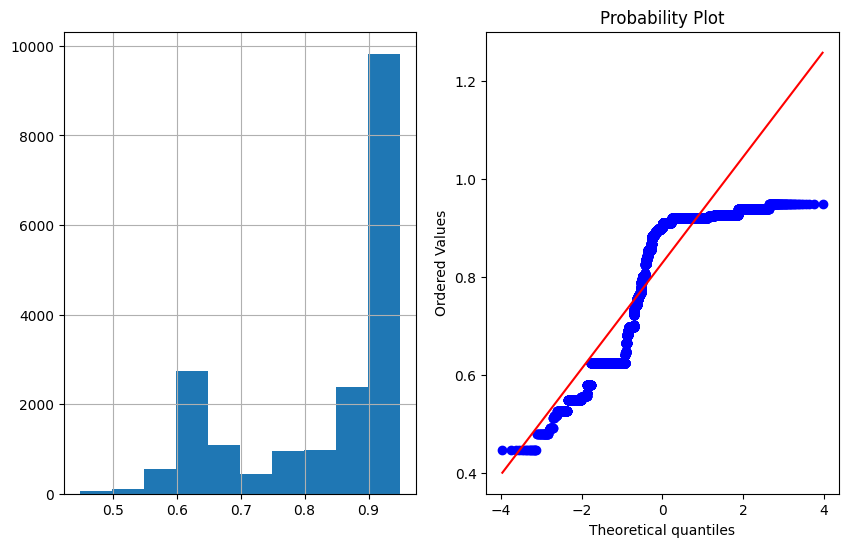

In [97]:
plot_data(df, 'city_development_index')

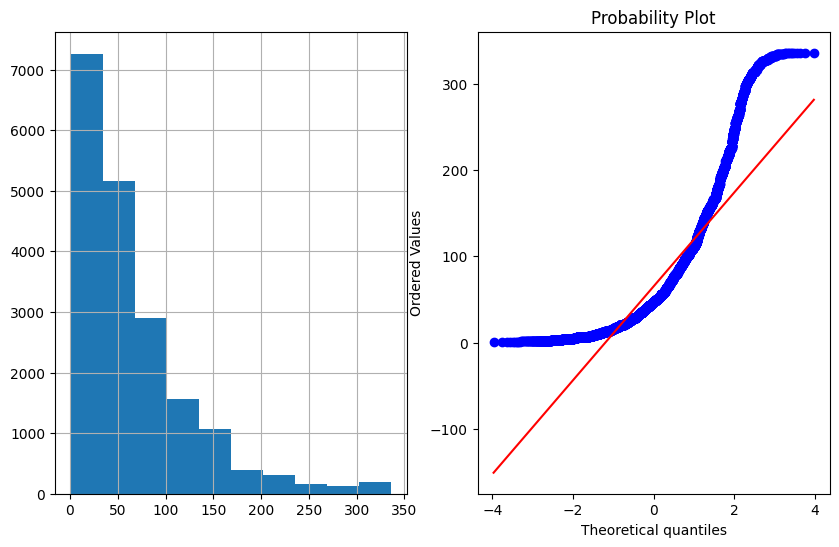

In [98]:
plot_data(df, 'training_hours')

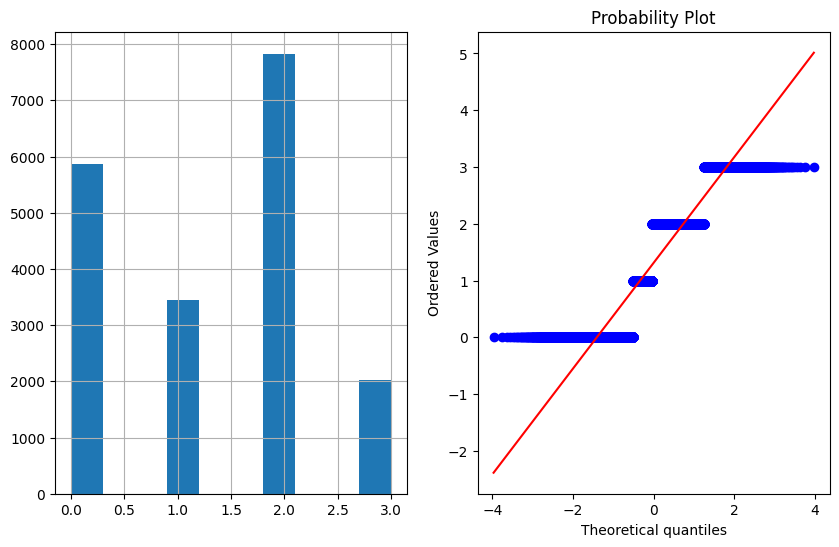

In [99]:
plot_data(df, 'company_size')

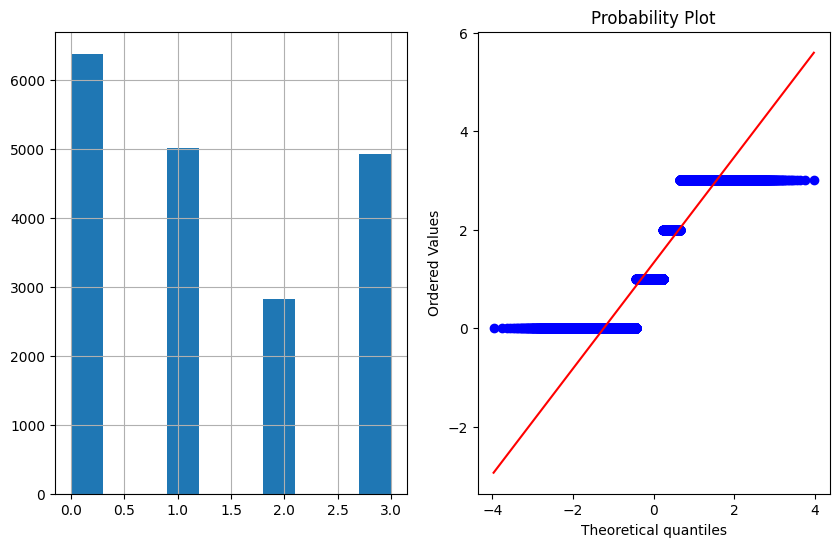

In [100]:
plot_data(df, 'experience')

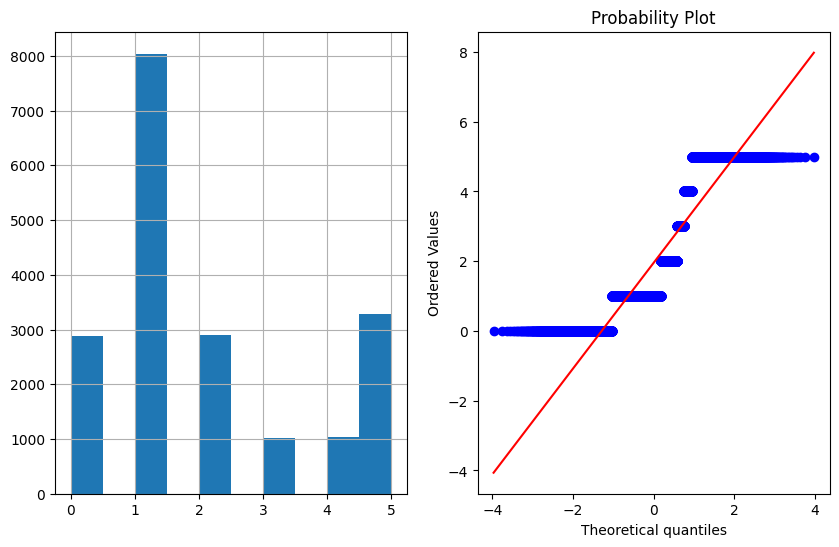

In [101]:
plot_data(df, 'last_new_job')

### saving the dataset for further processing

In [103]:
df = df.to_csv('aug_train_clean.csv')

In [102]:
df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

### train, test split

In [110]:
df = pd.read_csv('aug_train_clean.csv')

In [111]:
X = df.drop(['Unnamed: 0', 'target'], axis = 1)
y = df['target']

In [112]:
X.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,gender_Female,gender_Male,major_Other,major_STEM,city_103,city_21,other,company_type_Pvt Ltd
0,0.920,1,0,2,3,2.0,1,36,0,1,0,1,1,0,0,0
1,0.776,0,0,2,2,0.0,5,47,0,1,0,1,0,0,1,1
2,0.624,0,2,2,0,2.0,0,83,1,0,0,1,0,1,0,0
3,0.789,0,1,2,0,2.0,0,52,1,0,1,0,0,0,1,1
4,0.767,1,0,3,3,0.0,4,8,0,1,0,1,0,0,1,0


In [113]:
y.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: target, dtype: float64

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.30)

### using smote to balance out the datasets

In [132]:
from imblearn.over_sampling import SMOTE

In [140]:
# smote = SMOTE(random_state = 42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)